# Reinforcment Learning: Defining Concepts Mathematically

This blog post is intended to give the reader a baseline understanding of the concepts underlying modern reinforcement learning algorithms. In particular, this blog post will reintroduce the concepts touched upon in our **first blog post**, although this time we will use math to build up a repertoire of definitions helping us to understand more advanced concepts and algorithms. Thus our first post is not mandatory to understand reinforcement learning, yet it is very helpful for newcomers to build up a solid intuition.

# The base Concepts

To start off, we will once again begin by examining the agent-environment duality. A reinforcement learning problem is defined by both the **environment** and the **agent**, whose actions effect said environment. We can now define the interaction of both: given a **state** $s \in \mathcal{S}$ it is the agents task to choose an **action** $a \in \mathcal{A}$. The environment will then give a **reward** $r \in  \mathcal{R}$ to the agent and determine the next state $s' \in \mathcal{S}$ based on the state $s$ and the action $a$ chosen by the agent. While doing so $\mathcal{S}$ constitutes the set of all possible states, $\mathcal{A}$ the set of all possible actions and $\mathcal{R}$ the set of all possible rewards. This relationship can also be easily illustrated.

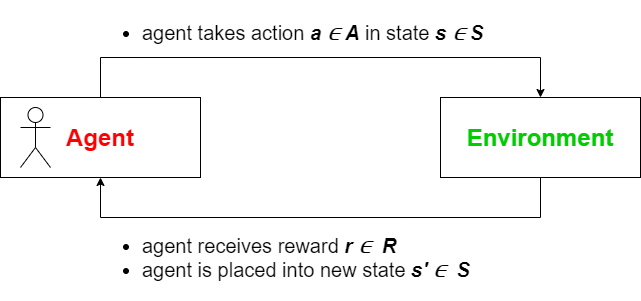

If we now define $s_1$ as the starting state and $r_t, s_t, a_t$ as the state, action or reward at timestep $t = 1, 2, \ldots, T$ with the condition that $s_T$ is a terminal state, we can show the entire interaction sequence between agent and environment, also called one **episode** (sometimes called "trial" or "trajectory"), as follows:

\begin{equation}
    \tau := (s_1, a_1, r_2, s_2, a_2, r_3, \ldots s_{T-1}, a_{T-1}, r_{T}, s_{T})
\end{equation}

Note that $s_t, a_t, r_t$ can also be denoted by capital letters $S_t, A_t, R_t$.

## The Environment

The environment can be modeled using a transition function $P(s', r | s, a)$ which gives us the probability to go to $s'$ as the next state with reward $r$ under the condition that the current state is $s$ and the agent chose action $a$. From this function we can also derive the state-transition function $P(s' | s, a)$ as well as the reward function $R(r | s, a)$.

\begin{align}
    P(s' | s, a) &:= P_{s, s'}^a = \sum_{r \in \mathcal{R}} P(s', r | s, a) \\
    R(r | s, a) &:=  \mathbb{E} [ r | s, a ] = \sum_{r \in \mathcal{R}} r \sum_{s' \in \mathcal{S}} P(s', r | s, a) \\
\end{align}

$R$ is the expected value for the reward $r$ given $s$ and $a$. A single **transition** in the environment can thus be specified by a tuple $(s, a, r, s')$.

### Markov Decision Processes

Given an episode $\tau$ in combination with a transition function $P(s' | s, a)$ we can observe:

\begin{equation}
        s_{t+1} \sim P(s_{t+1} | s_t, a_t) = P(s_{t+1} | s_t, a_t, s_{t-1}, a_{t-1}) = P(s_{t+1} | s_t, a_t, s_{t-1}, a_{t-1},...,s_1, a_1)
\end{equation}

Therefore $s_{t+1}$ is only dependent on timestep $t$ and its associated state $s_t$ and action $a_t$. The future state is independent from the past and only dependent on the present. This property is also called the **Markov Property** and enables us to view man reinforcement learning problems as **Markov Decision Processes**. While not important for simple algorithms, more advanced approaches utilise this view and its mathematical implications to further refine the learning process.

### Model-based vs Model-free

Depending on how much the agent knows about the **transition function** $P$ and the **reward function** $R$ we can already classify reinforcement learning algorithms as:

- Model-based: The agent has knowledge of the environment. This can be further subdivided:
    - Model is given: The agent knows $P$ and $R$ perfectly. AlphaGo can be seen as such an example as the program is perfectly aware of the Go rules.
    - Model is learned: While $P$ and $R$ are not known at the start, the agent learns these functions during the learning process.
- Model-free: The agent does not have and does not attempt to learn $P$ and $R$. Agent57 (the successor of DQN) developed by Google DeepMind falls into this category as the agent plays 57 different Atari games, showing above human performance and learning only using high-dimensional sensory input in the form of the screen pixels.



## The Agent

As stated above, the agents goal is to choose an action $a$ given a state $s$. We can formalize this using a function $\pi$ also known as **policy**. The policy can take one of two forms:

- deterministic: $a = \pi(s)$ (also written as $\mu (s)$)
- stochastic: $\pi(a | s)$ is the chance that $a$ is chosen under the condition $s$. In this case the derived action is denoted by $a \sim \pi(\cdot | s)$.

The goal of our reinforcement learning algorithms will always be to develop a policy $\pi$ which is as close as possible to the optimal policy $\pi_*$. One of the main differences in the various algorithms is the method used to determine this policy $\pi$.

To gain a better understanding of these methods it can be helpful to imagine how a human would go about formulating a strategy in such circumstances. This is especially intuitive when looking at games as reinforcement learning problems where the programm effectively replaces a human player.

### Value Function

One approach a human might use is to assign a value to each state based on how "good" that state is for generating future rewards. The policy could then simply consist of taking the action which leads to the next state with the highest value weighted by probabilities. Although informal, this describes the concept of the **state-value function** $V(s)$ (also known as value function).
 
Yet before we can formally describe $V(s)$ we need to define the future reward or **return** $G_t$, which measures the discounted rewards after timestep $t$ in an episode:

\begin{align}
    G_t := r_{t+1} + \gamma r_{t+2} + \gamma^2 r_{t+3} + \ldots = \sum_{k = 0}^\infty \gamma^k r_{t+1+k}
\end{align}

The form of $G_t$ above is called the **infinite horizon discounted-return**. If we instead summed up only to a constant $T$ instead of $\infty$ we would get the **finite horizon discounted-return**. 


The factor $\gamma \in [0, 1]$ is a hyperparameter discounting rewards baseed on how far in the future they occur. Doing this has multiple practical reasons as we may prefer immediate benefits over drawn out ones (such as winning a game quickly). Further, this also provides mathematical advantages when encountering loops in the transition sequence and further allows:

\begin{align}
    G_t &= r_{t+1} + \gamma r_{t+2} + \gamma^2 r_{t+3} + \ldots \\
    &= r_{t+1} + \gamma (r_{t+2} + \gamma r_{t+3} + \ldots) \\
    &= r_{t+1} + \gamma G_{t+1}
\end{align}

Using the return, we can now define an equation for $V(s)$:

\begin{align}
    V(s) &:= \mathbb{E}[G_t | s_t = s] \\
    V_\pi(s) &= \sum_{a} \pi(a | s) \sum_{s', r} P(s', r | s, a) (r + \gamma V_\pi(s'))
\end{align}

Note the dependency of $V(s)$ on an episode or a policy. The second equation here is also called a **Bellman equation**. Therefore a policy is required to determine the state-value function and we can define $V^*(s)$ as the function generated by the opotimal policy $\pi_*$. Once a function $V(s)$ is given we can derive a greedy policy $\pi$ accordingly:

\begin{align}
    \pi(s) = \text{arg} \max_{a} \sum_{s', r} P(s', r | s, a) (r + \gamma V(s'))
\end{align}


If we can find an algorithm in which $V_\pi(s)$, generated by the current policy $\pi$, converges on $V_*(s)$ we can thus derive the optimal policy $\pi_*$. This approach is realized in the **policy-iteration** algorithm which alternates between generating a state-value function from a policy and generating a policy from the state-value function.


### Action-Value Function

Instead of only evaluating states, it is also possible to evaluate state-actions pairs, resulting in the **action-value function** $Q(s, a)$. We can define $Q(s, a)$ similarly to $V(s)$ and logically connect both functions for a given policy:

\begin{align}
    Q(s, a) &:= \mathbb{E}[G_t | s_t = s, a_t = a] \\
    V_\pi(s) &= \sum_{a} \pi(a | s) Q_\pi(s, a) \\
    Q_\pi(s, a) &= \sum_{s', r} P(s', r | s, a) (r + \gamma V_\pi(s'))
\end{align}

We can also define the **Bellman equation**:

\begin{align}
    Q_\pi(s, a) &= \sum_{s', r} P(s', r | s, a) (r + \gamma \sum_{a'} \pi(a' | s) Q_\pi(s', a')) \\
\end{align}

The action-value function can also be used to greedily generate a policy:

\begin{align}
    \pi(s) = \text{arg} \max_{a} Q(s, a)
\end{align}


## Approaches to Reinforcement Learning

In theory, every problem we describe using this framework could be seen as a simple planning problem, only requiring the maximum solution to the Bellman equation to derive an optimal policy. In practice, however, the number of possible states and actions as well as the limited knowledge of the environment makes this unfeasible, forcing us to find other ways of converging on the optimal policy. Therefore algorithms tend to optimize the state-value function, the action-value function or the policy directly. If the policy is directly optimized, it tends to consist of another function with a given set of parameters that can be optimized.
 
Since we have defined the most important terms, we can now delve deeper into specific algorithms and approaches. This will further our understanding of reinforcement learning and detail the implementation of 


## References

- [Lilian Wang: A (Long Peek into Reinforcment Learning)](https://lilianweng.github.io/lil-log/2018/02/19/a-long-peek-into-reinforcement-learning.html)

- [OpenAI: Spinning Up]
